In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import obspy
from hydrophone_data_processing import tempmatch

In [2]:
datadirs = [
 '/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.01.GDH.2019.141'
,'/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.02.GDH.2019.141'
,'/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.03.GDH.2019.141'
,'/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.04.GDH.2019.141'
,'/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.05.GDH.2019.141'
,'/media/sda/data/robdata/Hydrophones/DAYS/A00/A00.7F.06.GDH.2019.141'
]

In [3]:
stream = obspy.read(datadirs[0])
for d in datadirs[1:]:
    stream += obspy.read(d)
    
stream = tempmatch.digest_data(stream)

In [7]:
stream[0].stats

         network: 7F
         station: A00
        location: 01
         channel: GDH
       starttime: 2019-05-21T00:00:04.958000Z
         endtime: 2019-05-22T00:00:04.625000Z
   sampling_rate: 1000.0
           delta: 0.001
            npts: 86399668
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 14851, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 60829696})
      processing: ["ObsPy 1.2.2: detrend(options={}::type='demean')", "ObsPy 1.2.2: filter(options={'freq': 40, 'corners': 4, 'zerophase': True}::type='highpass')"]

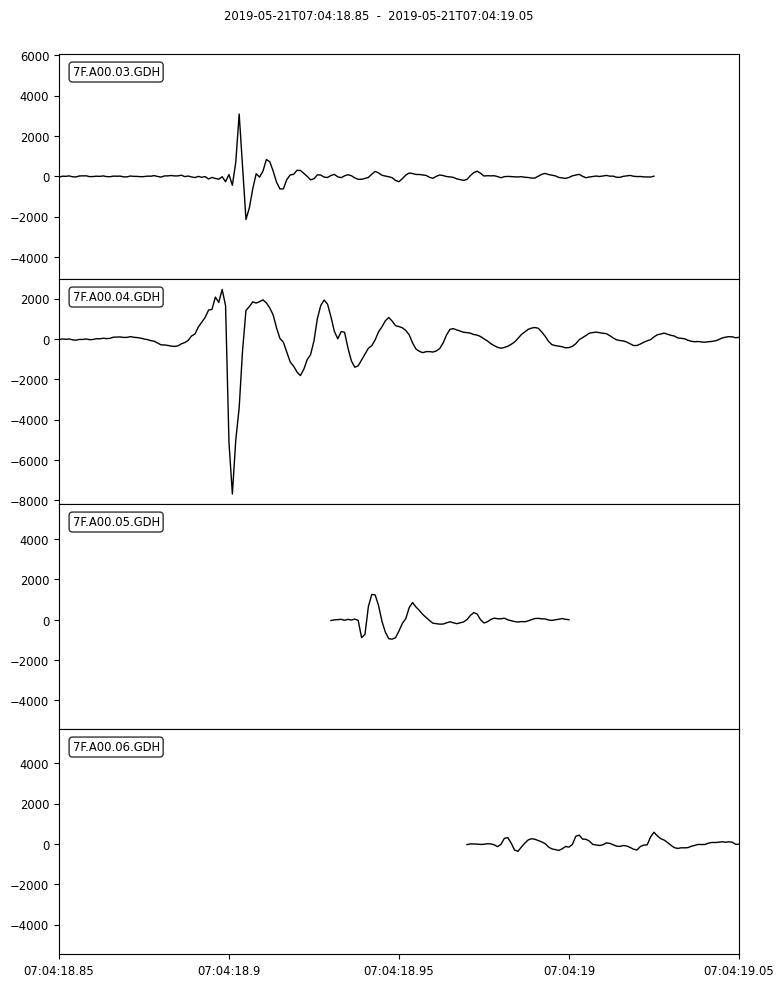

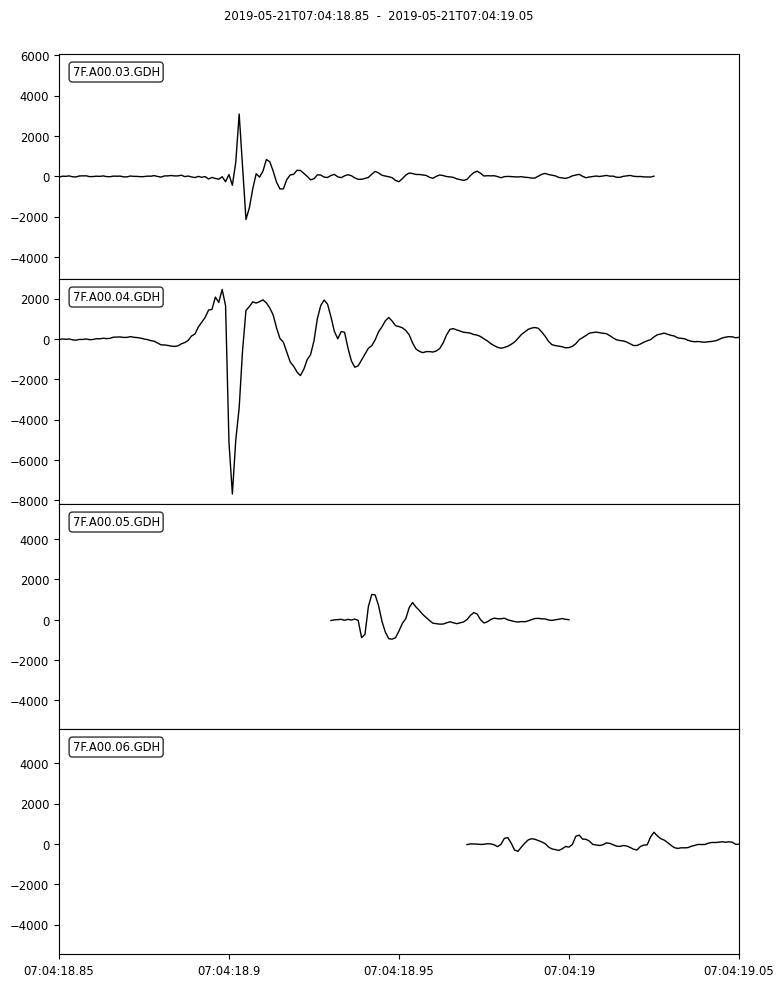

In [29]:
templates = stream.select(id='7F.A00.03.GDH').slice(obspy.UTCDateTime('2019-05-21T07:04:18.85'), obspy.UTCDateTime('2019-05-21T07:04:19.025'))
templates += stream.select(id='7F.A00.04.GDH').slice(obspy.UTCDateTime('2019-05-21T07:04:18.85'), obspy.UTCDateTime('2019-05-21T07:04:19.05'))
templates += stream.select(id='7F.A00.05.GDH').slice(obspy.UTCDateTime('2019-05-21T07:04:18.93'), obspy.UTCDateTime('2019-05-21T07:04:19.00'))
templates += stream.select(id='7F.A00.06.GDH').slice(obspy.UTCDateTime('2019-05-21T07:04:18.97'), obspy.UTCDateTime('2019-05-21T07:04:19.05'))
templates.plot()

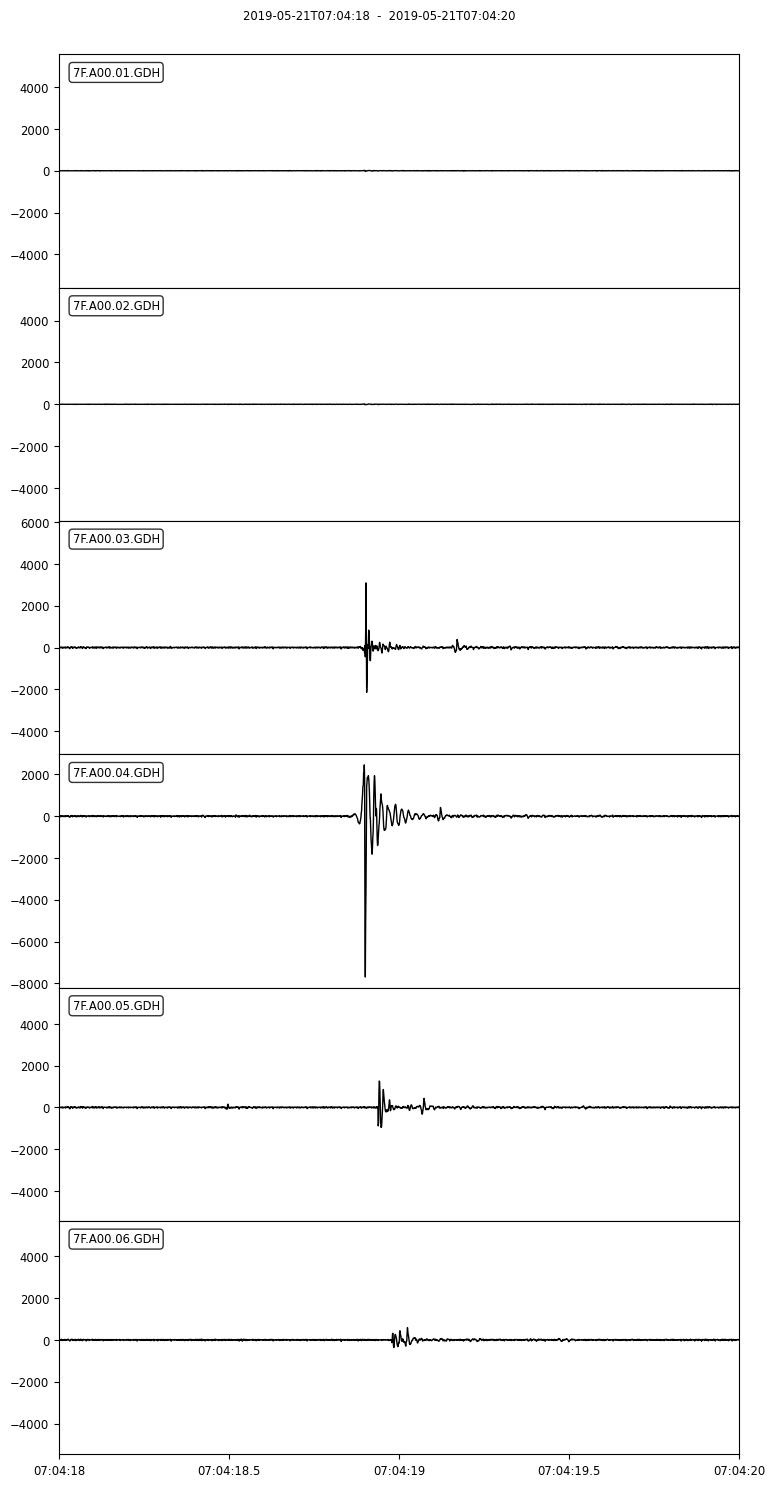

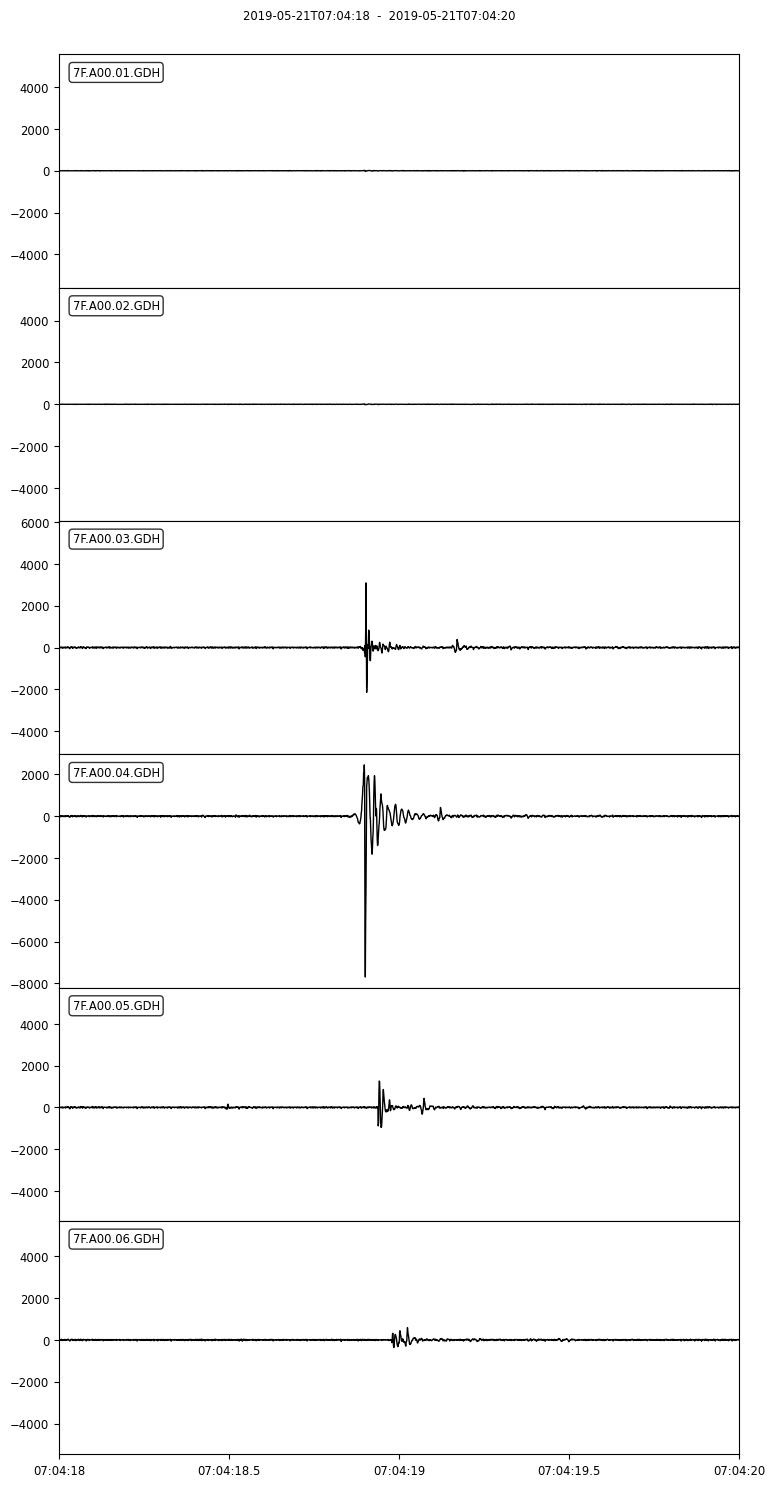

In [8]:
s = obspy.UTCDateTime('2019-05-21T07:04:18')
e = obspy.UTCDateTime('2019-05-21T07:04:20')
stream.plot(starttime=s, endtime=e, method='full')